In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Codebase_AGWittmann/code-base/beamtime/')
import plot_SNVM_data as pSd
import SNVM_B_xyz_extraction as Sdp
from math import ceil

import matplotlib as mpl
from matplotlib_scalebar.scalebar import ScaleBar
from math import ceil,floor,pi
import colorsys
import cv2
from skimage.util.shape import view_as_blocks
from skimage.io import imsave
from skimage.measure import profile_line
import scipy.ndimage

In [88]:
#foldername = '/home/julisko/Seafile/My Library/Mumax/Mumax_Files/DyIG/180deg_DW_for_diff_NVprojections.out/'
foldername = '/home/julisko/Seafile/My Library/Mumax/Mumax_Files/DyIG/demagOnly_180deg_DW_for_diff_NVprojections.out'
#filename = '/demag_180degDW.csv' #512,4,256
filename = '/demagOnly_demag_180degDW.csv' # 512,3,256
#filename = '/regions000000.csv' #512,4,256
#filename = '/180degDW_geom.csv' #512,4,256

#foldername = '/home/julisko/Seafile/My Library/Mumax/Mumax_Files/DyIG/FilmOnly_180deg_DW_for_diff_NVprojections.out'
#filename  = '/FilmOnly_180degDW_magnetiz.csv' # 512,3,39

pathname  = foldername+filename


In [89]:
#read file

file_df = pd.read_csv(pathname, header=None)
#print(file_df.shape,'\n',file_df)
x_shape = int(512)
y_shape = int(4)
z_shape = int(256)
data = file_df.to_numpy()
data = data.reshape((3,z_shape,y_shape,x_shape))
#data = data.reshape((z_shape,y_shape,x_shape)) # for regions file
data_yavg = np.average(data, axis = 2) #avg in y direction
#print(data.shape, data)
demag_x = data[0]
demag_y = data[1]
demag_z = data[2]

demag_x_yavg = data_yavg[0]
demag_y_yavg = data_yavg[1]
demag_z_yavg = data_yavg[2]


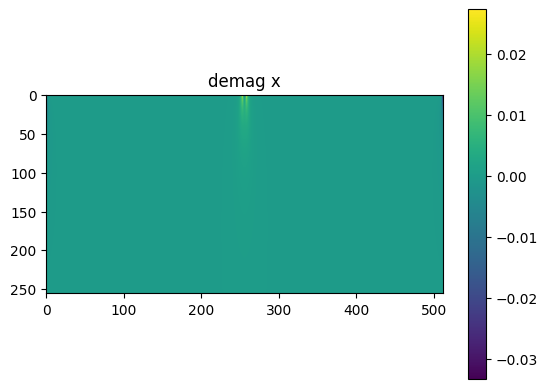

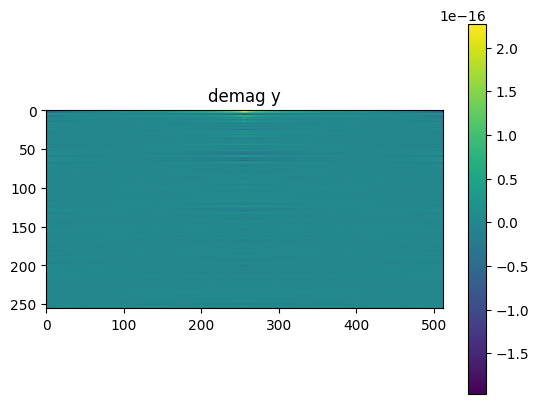

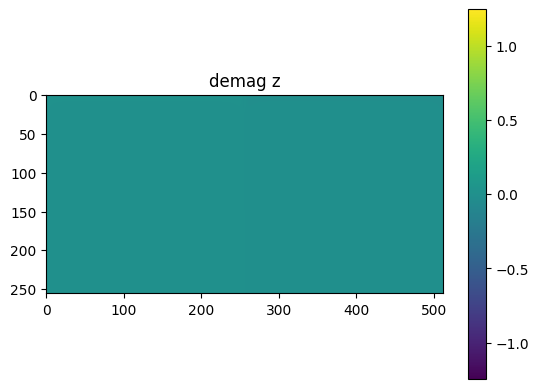

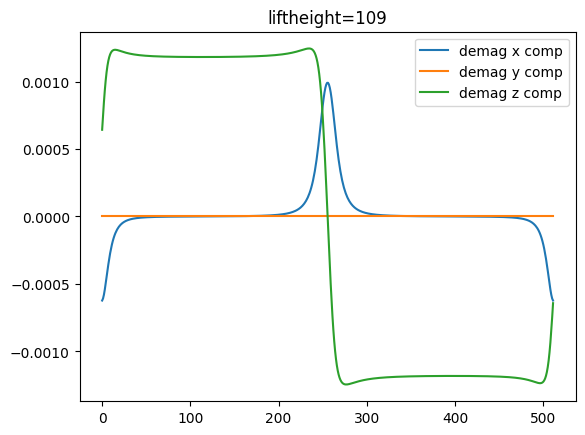

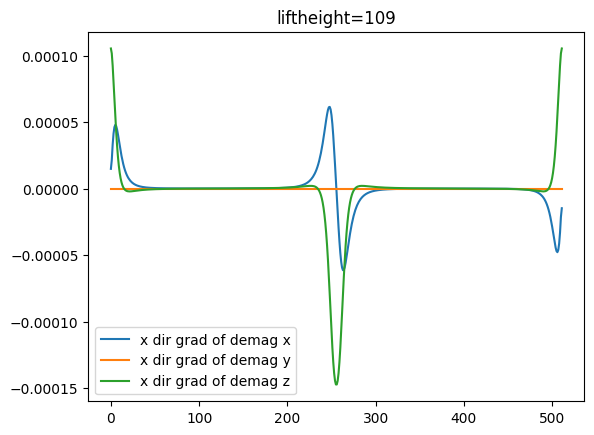

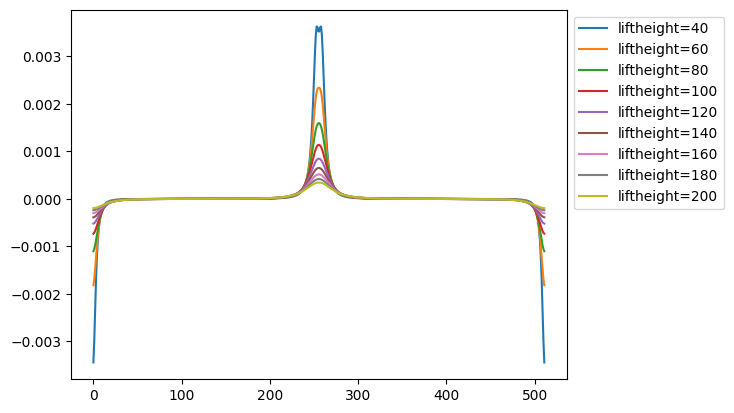

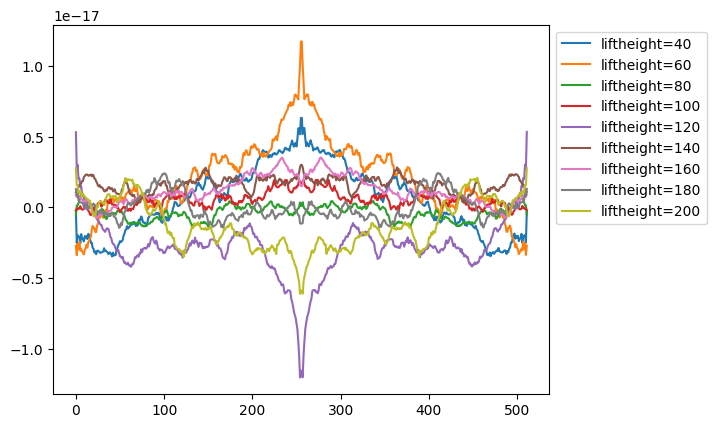

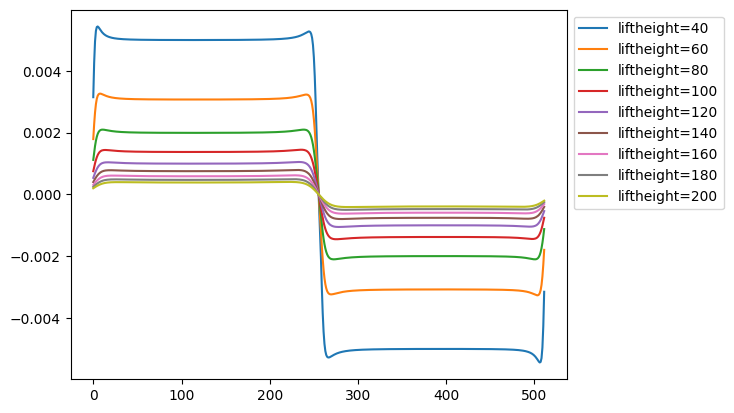

In [90]:
# define params for projection

liftheight = int(109)

liftheight_gradient = 109

theta_NV = 90
phi_NV = 90

plotstart_px = 0#int(150)
plotend_px = 512#int(360)

# for height dependence

liftheight_dep_min = 40
liftheight_dep_max = 200
liftheight_dep_step = 20

# project onto NV axis

theta_NV_rad = np.radians(theta_NV)
phi_NV_rad = np.radians(phi_NV)

demag_proj = demag_x * np.sin(theta_NV_rad)*np.cos(phi_NV_rad) + demag_y * np.sin(theta_NV_rad) * np.sin(phi_NV_rad) + demag_z * np.cos(theta_NV_rad)
demag_proj_yavg = demag_x_yavg * np.sin(theta_NV_rad)*np.cos(phi_NV_rad) + demag_y_yavg * np.sin(theta_NV_rad) * np.sin(phi_NV_rad) + demag_z_yavg * np.cos(theta_NV_rad)

# in case non-vectorial data should be shown

#plt.imshow(data[:,int(y_shape/2),plotstart_px:plotend_px])


# calculate gradients

demag_x_gradx = np.gradient(demag_x, axis = 2)
demag_y_gradx = np.gradient(demag_y, axis = 2)
demag_z_gradx = np.gradient(demag_z, axis = 2)

# plot results



im = plt.imshow(demag_x[:,int(y_shape/2),:])#,vmin = -0.00001, vmax = 0.00001)
cb=plt.colorbar(im)
plt.title('demag x')
plt.show()

im = plt.imshow(demag_y[:,int(y_shape/2),:])#,vmin = -0.0001, vmax = 0.0001)
cb=plt.colorbar(im)
plt.title('demag y')
plt.show()

im = plt.imshow(demag_z[:,int(y_shape/2),:])#,vmin = -0.0001, vmax = 0.0001)
cb=plt.colorbar(im)
plt.title('demag z')
plt.show()

#im = plt.imshow(demag_proj[::-1,int(y_shape/2),:])#,vmin = -0.0001, vmax = 0.0001)
#cb=plt.colorbar(im)
#plt.show()


plt.plot(demag_x[liftheight,int(y_shape/2),plotstart_px:plotend_px],label='demag x comp')
plt.plot(demag_y[liftheight,int(y_shape/2),plotstart_px:plotend_px],label='demag y comp')
plt.plot(demag_z[liftheight,int(y_shape/2),plotstart_px:plotend_px],label='demag z comp')
#plt.plot(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px],label=r'demag proj onto $\varphi=$'+str(phi_NV))
plt.legend()
plt.title('liftheight='+str(liftheight))
plt.show()

plt.plot(demag_x_gradx[liftheight_gradient,int(y_shape/2),plotstart_px:plotend_px],label='x dir grad of demag x')
plt.plot(demag_y_gradx[liftheight_gradient,int(y_shape/2),plotstart_px:plotend_px],label='x dir grad of demag y')
plt.plot(demag_z_gradx[liftheight_gradient,int(y_shape/2),plotstart_px:plotend_px],label='x dir grad of demag z')
#plt.plot(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px],label=r'demag proj onto $\varphi=$'+str(phi_NV))
plt.legend()
plt.title('liftheight='+str(liftheight))
plt.show()


# Height dependence in linecut #

# demag x
for liftheight in np.arange(liftheight_dep_min,liftheight_dep_max+liftheight_dep_step,liftheight_dep_step):
    plt.plot(demag_x[liftheight,int(y_shape/2),plotstart_px:plotend_px],label=r'liftheight='+str(liftheight))
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# demag y
for liftheight in np.arange(liftheight_dep_min,liftheight_dep_max+liftheight_dep_step,liftheight_dep_step):
    plt.plot(demag_y[liftheight,int(y_shape/2),plotstart_px:plotend_px],label=r'liftheight='+str(liftheight))
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# demag z
for liftheight in np.arange(liftheight_dep_min,liftheight_dep_max+liftheight_dep_step,liftheight_dep_step):
    plt.plot(demag_z[liftheight,int(y_shape/2),plotstart_px:plotend_px],label=r'liftheight='+str(liftheight))
plt.legend(bbox_to_anchor = (1,1))
plt.show()


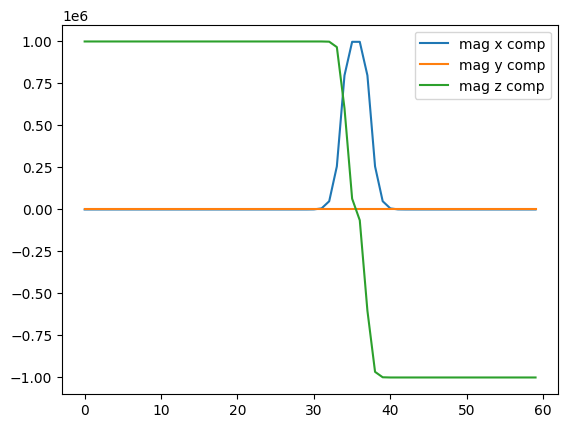

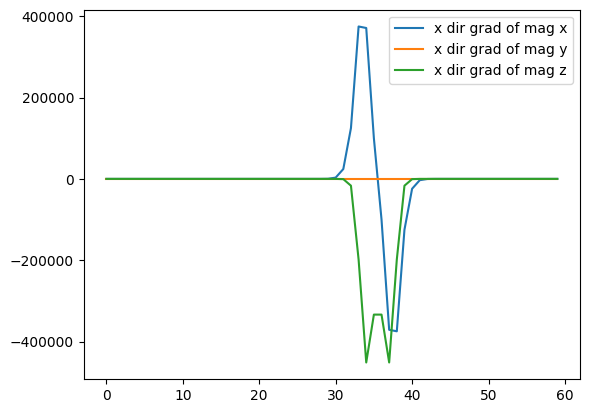

In [175]:
# plot profile of magnetization 

foldername_mag = '/home/julisko/Seafile/My Library/Mumax/Mumax_Files/DyIG/180deg_DW_for_diff_NVprojections.out/'
filename_mag = '/180degDW_magnetiz.csv' #512,4,256
pathname_mag  = foldername_mag+filename_mag

liftheight_mag = int(19)

plotstart_px = 220#int(150)
plotend_px = 280#int(360)

file_df_mag = pd.read_csv(pathname_mag, header=None)
data_mag = file_df_mag.to_numpy()
data_mag = data_mag.reshape((3,z_shape,y_shape,x_shape))
#data = data.reshape((z_shape,y_shape,x_shape)) # for regions file
data_yavg_mag = np.average(data_mag, axis = 2) #avg in y direction
#print(data.shape, data)
mag_x = data_mag[0]
mag_y = data_mag[1]
mag_z = data_mag[2]

# calculate gradients

mag_x_gradx = np.gradient(mag_x, axis = 2)
mag_y_gradx = np.gradient(mag_y, axis = 2)
mag_z_gradx = np.gradient(mag_z, axis = 2)

# plotting

plt.plot(mag_x[liftheight_mag,int(y_shape/2),plotstart_px:plotend_px],label='mag x comp')
plt.plot(mag_y[liftheight_mag,int(y_shape/2),plotstart_px:plotend_px],label='mag y comp')
plt.plot(mag_z[liftheight_mag,int(y_shape/2),plotstart_px:plotend_px],label='mag z comp')
plt.legend()
plt.show()

plt.plot(mag_x_gradx[liftheight_mag,int(y_shape/2),plotstart_px:plotend_px],label='x dir grad of mag x')
plt.plot(mag_y_gradx[liftheight_mag,int(y_shape/2),plotstart_px:plotend_px],label='x dir grad of mag y')
plt.plot(mag_z_gradx[liftheight_mag,int(y_shape/2),plotstart_px:plotend_px],label='x dir grad of mag z')
plt.legend()
plt.show()

In [177]:
x_extent = 5120 # nm
y_extent = 4 # nm
z_extent = 256 # nm

liftheight_eta = 139
DyIG_thickness = 39

dx = x_extent/x_shape
kx = 2 * np.pi * np.linspace(-x_shape/2,x_shape/2-1,x_shape-1)/(dx*x_shape)

eta = np.exp(-kx*(liftheight_eta-DyIG_thickness))

print(np.shape(eta), eta)




(511,) [4.40315059e+13 3.89370536e+13 3.44320303e+13 3.04482389e+13
 2.69253728e+13 2.38101029e+13 2.10552702e+13 1.86191721e+13
 1.64649309e+13 1.45599358e+13 1.28753489e+13 1.13856690e+13
 1.00683453e+13 8.90343612e+12 7.87330714e+12 6.96236425e+12
 6.15681760e+12 5.44447282e+12 4.81454645e+12 4.25750266e+12
 3.76490892e+12 3.32930836e+12 2.94410685e+12 2.60347322e+12
 2.30225096e+12 2.03588015e+12 1.80032850e+12 1.59203020e+12
 1.40783205e+12 1.24494566e+12 1.10090525e+12 9.73530337e+11
 8.60892722e+11 7.61287297e+11 6.73206236e+11 5.95316167e+11
 5.26437992e+11 4.65529032e+11 4.11667249e+11 3.64037283e+11
 3.21918111e+11 2.84672134e+11 2.51735523e+11 2.22609683e+11
 1.96853707e+11 1.74077702e+11 1.53936884e+11 1.36126362e+11
 1.20376520e+11 1.06448938e+11 9.41327788e+10 8.32416013e+10
 7.36105347e+10 6.50937842e+10 5.75624230e+10 5.09024415e+10
 4.50130209e+10 3.98050072e+10 3.51995615e+10 3.11269666e+10
 2.75255717e+10 2.43408586e+10 2.15246174e+10 1.90342157e+10
 1.68319540e+10 1

[  0  45  90 135 180]


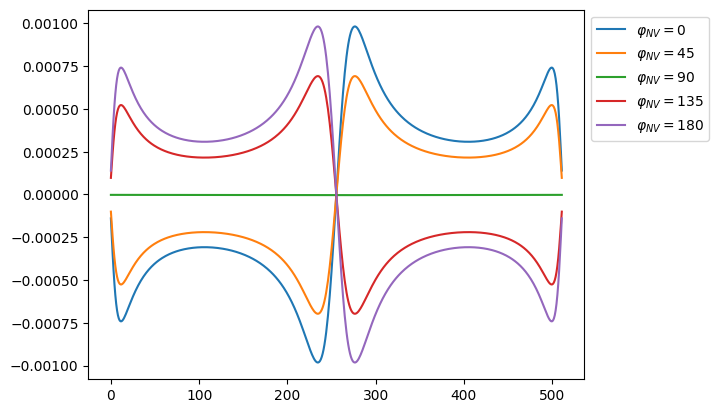

[255, 255, 0, 255, 255]


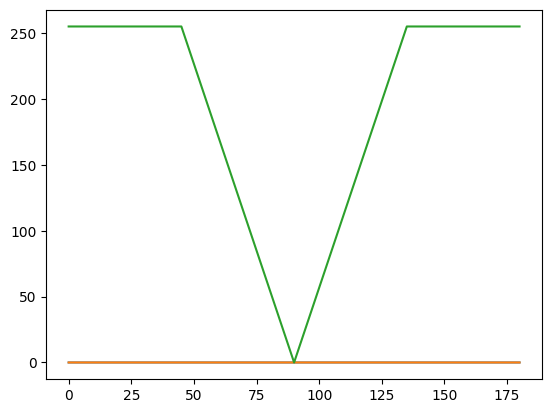

In [7]:
# define params for projection

liftheight = 139

plotstart_px = 0#180
plotend_px = 512#350

theta_NV = 90
phi_start = 0
phi_end = 180
phi_steps = 45

# project onto different phi rotations of NV axis

phis = np.arange(phi_start,phi_end+phi_steps,phi_steps)
print(phis)

demag_projs = np.zeros((len(phis),(plotend_px-plotstart_px)))

maxs = []
mins = []
zero_crossings = []

zero_temp = 0
max_temp = 0

theta_NV_rad = np.radians(theta_NV)

for phi_NV in phis:
    phi_NV_rad = np.radians(phi_NV)
    
    demag_proj = demag_x * np.sin(theta_NV_rad)*np.cos(phi_NV_rad) + demag_y * np.sin(theta_NV_rad) * np.sin(phi_NV_rad) + demag_z * np.cos(theta_NV_rad)
    demag_proj_yavg = demag_x_yavg * np.sin(theta_NV_rad)*np.cos(phi_NV_rad) + demag_y_yavg * np.sin(theta_NV_rad) * np.sin(phi_NV_rad) + demag_z_yavg * np.cos(theta_NV_rad)

    index = int(np.where(phis == phi_NV)[0][0])
    max_temp = np.max(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px])
    min_temp = np.min(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px])
    zero_temp_arrform = np.where(np.diff(np.sign(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px])))
    if np.size(zero_temp_arrform) == 0:
        zero_temp = 0
    else:
        zero_temp = (zero_temp_arrform[0][0])
    maxs.append(max_temp)
    mins.append(min_temp)
    zero_crossings.append((zero_temp))

    demag_projs[index] = demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px]
    plt.plot(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px],label=r'$\varphi_{NV}=$'+str(phi_NV))

plt.legend(bbox_to_anchor = (1,1))
plt.show()

#plt.imshow(demag_projs[:,:].transpose())
#plt.show()

plt.plot(phis,maxs)
plt.plot(phis,mins)
#plt.show()

maxdist = (zero_crossings-np.nanmean(zero_crossings))
print(zero_crossings)
plt.plot(phis,np.array(zero_crossings))#/np.nanmax(zero_crossings)*2*np.nanmax(maxs)-np.nanmax(maxs))
plt.show()
